In [1]:
# import the pandas and warnings libraries
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# The first 5 observations of the student alcohol comsumption dataframe
df1 = pd.read_csv('student-mat.csv')
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# The last five observations of the dataframe
df1.tail() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [4]:
# The shape of the dataframe
df1.shape 

(395, 33)

### Context:


The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

In [5]:
# Let's start with the first feature
# Schoool: It represents the name of the student's school in abbr.
# We can either create a new column with the full name of the schools
# Or Replace the values in the column with the full names

In [6]:
df1['school'].head(3)

0    GP
1    GP
2    GP
Name: school, dtype: object

In [7]:
# Let's check the uniqueness of the column
df1['school'].unique()

array(['GP', 'MS'], dtype=object)

In [8]:
# Use the replace function in pandas to replace GP & MS
df1['school_binary'] = df1['school'].replace({'GP':1, 'MS':2})

In [9]:
df1[['school','school_binary']].head(2)

,school,school_binary
0,GP,1
1,GP,1


In [10]:
df1[['school','school_binary']].tail(2) 

,school,school_binary
393,MS,2
394,MS,2


In [57]:
# You can also create a new column
df2 = pd.read_csv('student-mat.csv')
df2.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [58]:
df2['school name'] = df2['school'].replace({'GP':'Gabriel Pereira', 'MS':'Mousinho da Silveira'})

In [59]:
df2[['school','school name']].head()

,school,school name
0,GP,Gabriel Pereira
1,GP,Gabriel Pereira
2,GP,Gabriel Pereira
3,GP,Gabriel Pereira
4,GP,Gabriel Pereira


In [60]:
# Here, we successfully created a new column out of an existing column

In [61]:
# One Hot Encoding 
# We can use the get_dummies function to convert a categorical
# variable to one hot encoding
# Converting categorical independent variables to multiple 
# binary columns
# Let's look at the sex column

In [62]:
# Here is a gender variable
df2['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [63]:
df2['sex'].tail()

390    M
391    M
392    M
393    M
394    M
Name: sex, dtype: object

In [64]:
# Check for its uniqueness
df2['sex'].unique() 

array(['F', 'M'], dtype=object)

In [65]:
# Using the get_dummies to convert the sex column to binary columns
sex_dummies = pd.get_dummies(data=df2['sex'],columns=['sex'])

# Concat the sex column with the one-hot encoded columns
pd.concat([df2['sex'],sex_dummies],axis=1).head() 

,sex,F,M
0,F,1,0
1,F,1,0
2,F,1,0
3,F,1,0
4,F,1,0


In [66]:
# Using the cut() function
df2['age'].head()

0    18
1    17
2    15
3    15
4    16
Name: age, dtype: int64

In [67]:
df2['age'].tail()  

390    20
391    17
392    21
393    18
394    19
Name: age, dtype: int64

In [68]:
# Let's use binning for the age column
# Using qcut, we can discretize the age values
# into quantiles or frequency groups

In [69]:
# let's see the distribution of the age values
df2['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [70]:
# Create 4 groups for these age distribution
groups = ['Young Teens', 'Old Teens', 'Early Twenties', 'Twenties']

In [71]:
df2['age_group'] = pd.qcut(df2['age'], q=4, labels=groups)
df2[['age','age_group']].head()

,age,age_group
0,18,Early Twenties
1,17,Old Teens
2,15,Young Teens
3,15,Young Teens
4,16,Young Teens


In [72]:
df2[['age','age_group']].tail()

,age,age_group
390,20,Twenties
391,17,Old Teens
392,21,Twenties
393,18,Early Twenties
394,19,Twenties


In [73]:
# Check the frequency
pd.DataFrame(df2['age_group'].value_counts())

,age_group
Young Teens,186
Old Teens,98
Early Twenties,82
Twenties,29


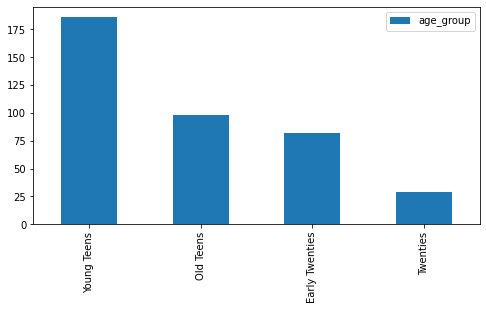

In [74]:
# Plot a bar graph of the frequency distribution 
pd.DataFrame(df2['age_group'].value_counts()).plot(kind='bar',figsize=(8,4));

In [75]:
# The cut function is also for discretization of a continous
# The cut function explicitly provides the bin edges

In [76]:
# The first 5 observations of the heart disease dataframe
df3 = pd.read_csv('heart.csv')
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
df3['age'].head() 

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [78]:
df3['age'].tail() 

298    57
299    45
300    68
301    57
302    57
Name: age, dtype: int64

In [79]:
df3['age'].min()   

29

In [80]:
df3['age'].max() 

77

In [81]:
# Define bins
bins = [0,17,35,50,60,80]

# Name of groups
groups = ['Young/Teens','Youths','Adults','Mid-Age','Seniors']

In [82]:
# Using Cut Function
df3['age_cut'] = pd.cut(df3['age'],bins=bins,labels=groups)
df3[['age','age_cut']].head() 

,age,age_cut
0,63,Seniors
1,37,Adults
2,41,Adults
3,56,Mid-Age
4,57,Mid-Age


In [83]:
df3[['age','age_cut']].tail() 

,age,age_cut
298,57,Mid-Age
299,45,Adults
300,68,Seniors
301,57,Mid-Age
302,57,Mid-Age


In [46]:
# Check the frequency
pd.DataFrame(df3['age_cut'].value_counts())

,age_cut
Mid-Age,129
Adults,88
Seniors,79
Youths,7
Young/Teens,0


In [309]:
# Apply function for Text Extraction
# Let's look a data frame
df4 = pd.read_csv('results.csv', low_memory=False)
df4.head(3)

,Unnamed: 0,petition_id,petition_ask,created_at,deleted_at,original_locale,title,description,targeting_description,letter_body,...,total_signup_count,supporter_message_count,hide_comments,hide_dm_action_panel,enable_human_verification,display_title,petition_title,petition_status,calculated_goal,progress
0,0,28127009,Free Kusha and reunite elephant pair,2021-04-01T00:07:47Z,NaN,en-IN,Karnataka Forest Department: Free Kusha and re...,"<p>Kusha, a male elephant from Dubare Elephant...","karnataka forest department, People for the Et...",Free Kusha and reunite elephant pair,...,84,NaN,False,False,False,Karnataka Forest Department: Free Kusha and re...,Karnataka Forest Department: Free Kusha and re...,active,7500,88.106667
1,1,28569017,Save Caracal cat in india,2021-04-25T19:56:09Z,NaN,en-IN,"Save Caracal cat in India: @BoardWelfare, @Man...",<p>#savefloppainindia trend and sharing this p...,Shri Prakash Javedkar (Cabinet Minister - Mini...,Save Caracal cat in india,...,8,NaN,False,False,False,"Save Caracal cat in India: @BoardWelfare, @Man...","Save Caracal cat in India: @BoardWelfare, @Man...",active,5000,52.920000
2,2,28566320,"Animal Treatment and ABC Centre for Borivli, K...",2021-04-25T15:40:17Z,NaN,en-IN,Municipal Commissioner of Mumbai: Animal Treat...,"<p>In Kandivli, Borivli Dahisar (Ward R), lack...",Municipal Commissioner of Mumbai,"Animal Treatment and ABC Centre for Borivli, K...",...,108,NaN,False,False,False,Municipal Commissioner of Mumbai: Animal Treat...,Municipal Commissioner of Mumbai: Animal Treat...,active,2500,94.680000


In [310]:
df4.columns

Index(['Unnamed: 0', 'petition_id', 'petition_ask', 'created_at', 'deleted_at',
       'original_locale', 'title', 'description', 'targeting_description',
       'letter_body', 'end_date', 'goal', 'slug', 'victory_date',
       'victory_description', 'is_verified_victory', 'is_victory', 'is_pledge',
       'sponsored_campaign', 'lat', 'long', 'displayed_signature_count',
       'total_signature_count', 'weekly_signature_count', 'total_page_views',
       'total_share_count', 'daily_signature_count', 'monthly_signature_count',
       'daily_signup_count', 'weekly_signup_count', 'monthly_signup_count',
       'total_signup_count', 'supporter_message_count', 'hide_comments',
       'hide_dm_action_panel', 'enable_human_verification', 'display_title',
       'petition_title', 'petition_status', 'calculated_goal', 'progress'],
      dtype='object')

In [311]:
df4.drop(columns=['Unnamed: 0'],inplace=True)

In [312]:
df4.head() 

,petition_id,petition_ask,created_at,deleted_at,original_locale,title,description,targeting_description,letter_body,end_date,...,total_signup_count,supporter_message_count,hide_comments,hide_dm_action_panel,enable_human_verification,display_title,petition_title,petition_status,calculated_goal,progress
0,28127009,Free Kusha and reunite elephant pair,2021-04-01T00:07:47Z,NaN,en-IN,Karnataka Forest Department: Free Kusha and re...,"<p>Kusha, a male elephant from Dubare Elephant...","karnataka forest department, People for the Et...",Free Kusha and reunite elephant pair,NaN,...,84,NaN,False,False,False,Karnataka Forest Department: Free Kusha and re...,Karnataka Forest Department: Free Kusha and re...,active,7500,88.106667
1,28569017,Save Caracal cat in india,2021-04-25T19:56:09Z,NaN,en-IN,"Save Caracal cat in India: @BoardWelfare, @Man...",<p>#savefloppainindia trend and sharing this p...,Shri Prakash Javedkar (Cabinet Minister - Mini...,Save Caracal cat in india,NaN,...,8,NaN,False,False,False,"Save Caracal cat in India: @BoardWelfare, @Man...","Save Caracal cat in India: @BoardWelfare, @Man...",active,5000,52.920000
2,28566320,"Animal Treatment and ABC Centre for Borivli, K...",2021-04-25T15:40:17Z,NaN,en-IN,Municipal Commissioner of Mumbai: Animal Treat...,"<p>In Kandivli, Borivli Dahisar (Ward R), lack...",Municipal Commissioner of Mumbai,"Animal Treatment and ABC Centre for Borivli, K...",NaN,...,108,NaN,False,False,False,Municipal Commissioner of Mumbai: Animal Treat...,Municipal Commissioner of Mumbai: Animal Treat...,active,2500,94.680000
3,28543362,Seven Sebastian to say the N word once Unbanne...,2021-04-24T06:29:05Z,NaN,en-IN,Facebook: Seven Sebastian to say the N word on...,<p>SVen sebaAstian was banned on Fb and that w...,"Facebook, Germany",Seven Sebastian to say the N word once Unbanne...,NaN,...,2,NaN,False,False,False,Facebook: Seven Sebastian to say the N word on...,Facebook: Seven Sebastian to say the N word on...,active,100,6.000000
4,28471106,"Don't buy animals, Adopt them!",2021-04-20T03:45:00Z,NaN,en-IN,People for the Ethical Treatment of Animals (P...,<p>I feel that animals are not just a thing to...,People for the Ethical Treatment of Animals (P...,"Don't buy animals, Adopt them!",NaN,...,46,NaN,False,False,False,People for the Ethical Treatment of Animals (P...,People for the Ethical Treatment of Animals (P...,active,500,97.200000


In [313]:
# Using the Pandas apply and or lambda to extract text
df4['petition_title'] = df4['petition_ask'].apply(lambda x: x.strip())
df4[['petition_title','petition_ask']].head()

,petition_title,petition_ask
0,Free Kusha and reunite elephant pair,Free Kusha and reunite elephant pair
1,Save Caracal cat in india,Save Caracal cat in india
2,"Animal Treatment and ABC Centre for Borivli, K...","Animal Treatment and ABC Centre for Borivli, K..."
3,Seven Sebastian to say the N word once Unbanne...,Seven Sebastian to say the N word once Unbanne...
4,"Don't buy animals, Adopt them!","Don't buy animals, Adopt them!"


In [314]:
def split_2(x):
    x = x.split()
    return x[:2]

In [315]:
df4['petition_title'] = df4['petition_ask'].apply(split_2)
df4[['petition_title','petition_ask']].head(10) 

,petition_title,petition_ask
0,"[Free, Kusha]",Free Kusha and reunite elephant pair
1,"[Save, Caracal]",Save Caracal cat in india
2,"[Animal, Treatment]","Animal Treatment and ABC Centre for Borivli, K..."
3,"[Seven, Sebastian]",Seven Sebastian to say the N word once Unbanne...
4,"[Don't, buy]","Don't buy animals, Adopt them!"
5,"[#JusticeforBuddy, -]",#JusticeforBuddy - Punish the perpetrators and...
6,"[Take, Action]",Take Action Immediately Like Saviors
7,"[Help, Stop]",Help Stop Ken-Betwa link project
8,"[Save, Caracal]",Save Caracal cat in india
9,"[Animal, Treatment]","Animal Treatment and ABC Centre for Borivli, K..."


In [316]:
# Value counts and apply() for frequency encoding
df2['Fjob'].head() 

0     teacher
1       other
2       other
3    services
4       other
Name: Fjob, dtype: object

In [317]:
# Frequency encoding using value_counts function 
Fjob_freq = df2['Fjob'].value_counts(normalize=True)

# Mapping the encoded values with original data 
df2['Fjob_freq'] = df2['Fjob'].apply(lambda x : Fjob_freq[x])

print('The sum of Fjob_freq variable:', sum(Fjob_freq))
df2[['Fjob', 'Fjob_freq']].head(6)

The sum of Fjob_freq variable: 1.0


,Fjob,Fjob_freq
0,teacher,0.073418
1,other,0.549367
2,other,0.549367
3,services,0.281013
4,other,0.549367
5,other,0.549367


In [318]:
# groupby() and transform() for Aggregation Features
# We would use a sales data here

In [319]:
# The first 5 observations of the sales dataframe
# I converted the 'Date' column to a datetime format
df5 = pd.read_csv('sales_data.csv',parse_dates=['Date'])
df5.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [320]:
df5['Profit_Mean'] = df5.groupby(['Sub_Category', 'Cost'])[
    'Profit'].transform(lambda x: x.mean())

df5[['Sub_Category','Cost',
      'Profit', 'Profit_Mean']].head()

,Sub_Category,Cost,Profit,Profit_Mean
0,Bike Racks,360,590,519.341463
1,Bike Racks,360,590,519.341463
2,Bike Racks,1035,1366,1512.000000
3,Bike Racks,900,1188,1380.000000
4,Bike Racks,180,238,246.000000


In [321]:
# Series.dt() for date and time based features
df5['Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Date, dtype: datetime64[ns]

In [322]:
df5['Sales Year'] = df5['Date'].dt.year
df5['Sales day of year']  = df5['Date'].dt.day
df5['Sales month of year'] = df5['Date'].dt.month
df5['Sales day of week'] = df5['Date'].dt.dayofweek
df5['Sales week of year'] = df5['Date'].dt.isocalendar().week

In [323]:
df5[['Date', 'Sales Year', 'Sales day of year', 'Sales month of year', 'Sales day of week', 'Sales week of year']].tail() 

,Date,Sales Year,Sales day of year,Sales month of year,Sales day of week,Sales week of year
113031,2016-04-12,2016,12,4,1,15
113032,2014-04-02,2014,2,4,2,14
113033,2016-04-02,2016,2,4,5,13
113034,2014-03-04,2014,4,3,1,10
113035,2016-03-04,2016,4,3,4,9


In [324]:
# We can convert the Sales day of week to actual day names
df5['Sales day of week'] = df5['Date'].apply(lambda x: x.day_name())
df5['Sales day of week'] = pd.Categorical(df5['Sales day of week'], categories=['Monday','Tuesday','Wednesday',
                                                                'Thursday','Friday','Saturday', 
                                                                'Sunday'], ordered=True)

In [325]:
df5[['Date', 'Sales Year', 'Sales day of year', 'Sales month of year',
    'Sales day of week', 'Sales week of year']].tail()

,Date,Sales Year,Sales day of year,Sales month of year,Sales day of week,Sales week of year
113031,2016-04-12,2016,12,4,Tuesday,15
113032,2014-04-02,2014,2,4,Wednesday,14
113033,2016-04-02,2016,2,4,Saturday,13
113034,2014-03-04,2014,4,3,Tuesday,10
113035,2016-03-04,2016,4,3,Friday,9
